<a href="https://colab.research.google.com/github/DudMarcal/DS/blob/main/Analisando_os_Dados_do_Airbnb_Genebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Genebra*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Genebra, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

 Todos os dados usados aqui foram obtidos do site Inside Airbnb.

 Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Genebra*.



In [2]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/switzerland/geneva/geneva/2024-06-29/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name`- Nome da propriedade anunciada
* `host_id`- número de id do proprietário (anfitrião) da propriedade
* `host_name`- Nome do Anfitrião
* `neighbourhood_group`- esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights`- Quantidade mínima de noites para reservar
* `number_of_reviews`- Número de reviews que a propriedade possui
* `last_review`- Data do último review
* `reviews_per_month`- Quantidade de reviews por mês
* `calculated_host_listings_count`- Quantidade de imóveis do mesmo anfitrião
* `availability_365`- Número de dias de disponibilidade dentro de 365 dias

* `number_of_reviews_ltm`- quantidade de avaliações nos últimos doze meses.

* `license`- número de licença ou registro dos anfitriões.

Antes de iniciar qualquer análise, verificaremos o nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,42515,Geneva center - Hosting females,185647,Noelle,NaN,Commune de Genève,46.20198,6.15672,Private room,89.0,3,77,2024-06-14,0.50,1,363,7,NaN
1,203997,Top location studio 1 block from lake!,1001280,Mike,NaN,Commune de Genève,46.19964,6.15580,Entire home/apt,165.0,5,88,2024-05-31,0.62,2,17,8,NaN
2,276025,Lovely flat by Geneva lake,1442438,Gaby,NaN,Versoix,46.28031,6.16833,Entire home/apt,78.0,7,119,2024-05-26,0.80,1,298,4,NaN
3,338682,Top location 1 block from the lake!,1001280,Mike,NaN,Commune de Genève,46.20708,6.15545,Entire home/apt,NaN,5,117,2024-04-16,0.78,2,5,2,NaN
4,399388,Nice modern bedroom with balcony,1994454,Oscar,NaN,Commune de Genève,46.18904,6.13908,Private room,54.0,2,53,2024-05-16,0.36,2,90,5,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A resposta para essas perguntas podem ser acessadas pelos comandos abaixo:

In [5]:
# identificar o volume de dados do DataFrame
print("Entrada:\t {}".format(df.shape[0]))
print("Varipaveis:\t {}\n".format(df.shape[1]))

# identificar o tipo de dados de cada coluna
print(df.dtypes)
# verificar as 5 primeiras entradas do dataset
display(df.head)

Entrada:	 2685
Varipaveis:	 18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


<bound method NDFrame.head of                        id                                       name  \
0                   42515            Geneva center - Hosting females   
1                  203997     Top location studio 1 block from lake!   
2                  276025                 Lovely flat by Geneva lake   
3                  338682        Top location 1 block from the lake!   
4                  399388           Nice modern bedroom with balcony   
...                   ...                                        ...   
2680  1187754473861260402                   Comfortable and spacious   
2681  1188217562031345090  Pretty & bright 1-bedroom by train + lake   
2682  1188304162593107104                     Room in cozy apartment   
2683  1188374875563151329              comfortable and spacious room   
2684  1188601831543854762               Sweet private flat in Geneva   

        host_id host_name  neighbourhood_group      neighbourhood   latitude  \
0        185647    Noelle                  NaN  Commune de Genève  46.201980   
1       1001280      Mike                  NaN  Commune de Genève  46.199640   
2       1442438      Gaby                  NaN            Versoix  46.280310   
3       1001280      Mike                  NaN  Commune de Genève  46.207080   
4       1994454     Oscar                  NaN  Commune de Genève  46.189040   
...         ...       ...                  ...                ...        ...   
2680  527042343     Maria                  NaN  Commune de Genève  46.217316   
2681     175640    Andrea                  NaN  Commune de Genève  46.210198   
2682  148644583     Naved                  NaN    Pregny-Chambésy  46.243576   
2683  501524020   Mahmoud                  NaN     Grand-Saconnex  46.229140   
2684   45569864   Nicolas                  NaN  Commune de Genève  46.211340   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
0      6.156720     Private room   89.0               3                 77   
1      6.155800  Entire home/apt  165.0               5                 88   
2      6.168330  Entire home/apt   78.0               7                119   
3      6.155450  Entire home/apt    NaN               5                117   
4      6.139080     Private room   54.0               2                 53   
...         ...              ...    ...             ...                ...   
2680   6.132119  Entire home/apt  200.0               1                  0   
2681   6.147269  Entire home/apt  159.0               1                  0   
2682   6.131826     Private room   60.0               1                  0   
2683   6.117780     Private room   63.0               1                  0   
2684   6.146290  Entire home/apt  150.0               4                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
0     2024-06-14               0.50                               1   
1     2024-05-31               0.62                               2   
2     2024-05-26               0.80                               1   
3     2024-04-16               0.78                               2   
4     2024-05-16               0.36                               2   
...          ...                ...                             ...   
2680         NaN                NaN                               2   
2681         NaN                NaN                               2   
2682         NaN                NaN                               2   
2683         NaN                NaN                               2   
2684         NaN                NaN                               1   

      availability_365  number_of_reviews_ltm license  
0                  363                      7     NaN  
1                   17                      8     NaN  
2                  298                      4     NaN  
3                    5                      2     NaN  
4                   90                      5     NaN  
...               

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entrada. Para isso, inserimos os comandos abaixo e deduzimos o seguinte:

* É possível ver que a coluna `neighbourhood_group`possui 100% dos seus valores faltantes.

* Na variável `license` quase 100% das linhas estão com valores faltantes. Menos de 0,1% não estão com valores faltantes nas linhas.  

* As variáveis `price`, `last_review`e `reviews_per_month`possuem valores faltantes entre 20% e 30% das linhas.



In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
license,0.999255
price,0.270019
last_review,0.216015
reviews_per_month,0.216015
host_name,0.000000
host_id,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

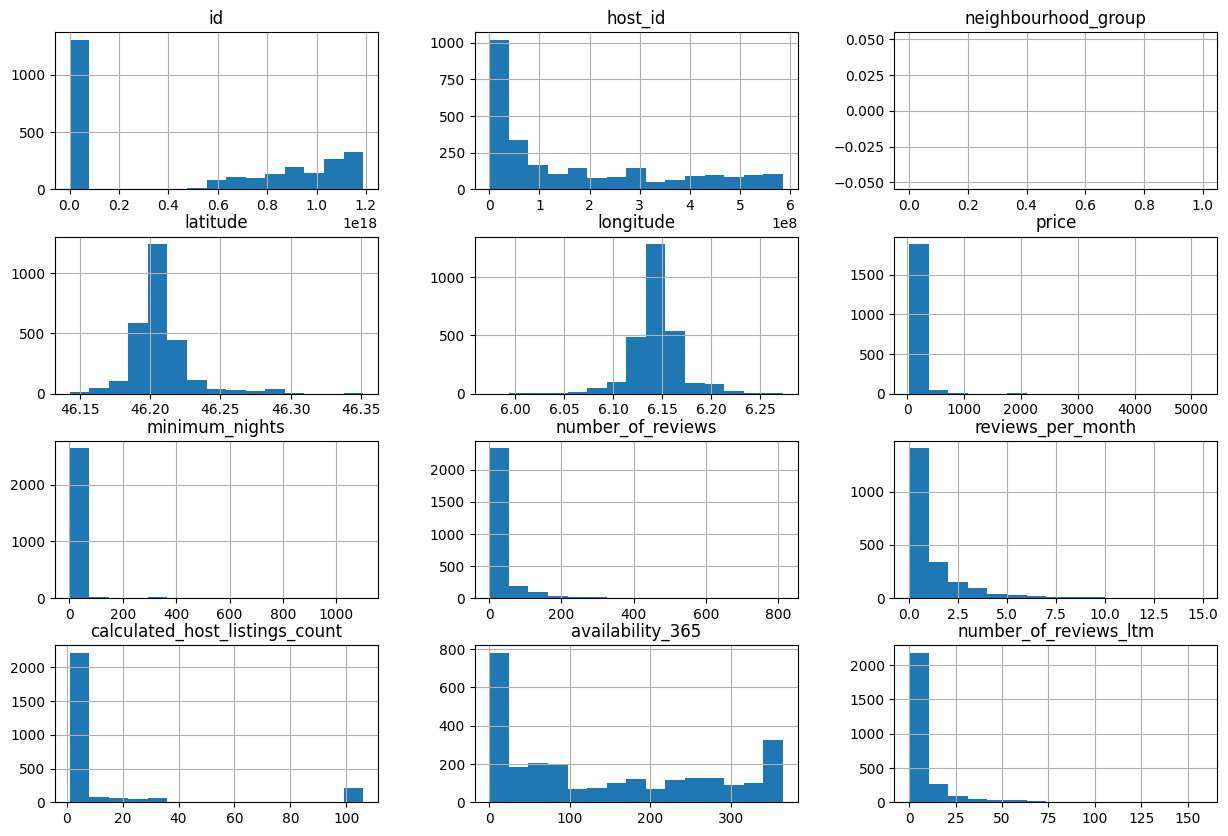

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4 Como verificar os *outliers* presentes?**

Veremos por meio de duas maneiras rápidas como detectar *outliers*. Utilizar o método `describe()`e plotar `boxplots`para a variável.


In [11]:
# verificar o resumo estatístico das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' ]].describe()



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1960.000000,2685.000000,2685.000000,2105.000000,2685.000000,2685.000000
mean,156.100000,8.322533,25.646182,1.161525,11.294227,140.702421
std,219.125792,42.798216,55.152174,1.601445,27.056556,130.496634
min,31.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.000000,1.000000,0.200000,1.000000,9.000000
50%,116.500000,3.000000,6.000000,0.570000,1.000000,90.000000
75%,164.000000,5.000000,25.000000,1.410000,4.000000,263.000000
max,5200.000000,1100.000000,814.000000,15.000000,106.000000,365.000000


Ao veriricar o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price`possui 75% do valor abaixo de 164, entretanto seu valor máximo é 5200.
* A quantidade mínima de noites(`minimum_nights`) está acima de 365 dias no ano.


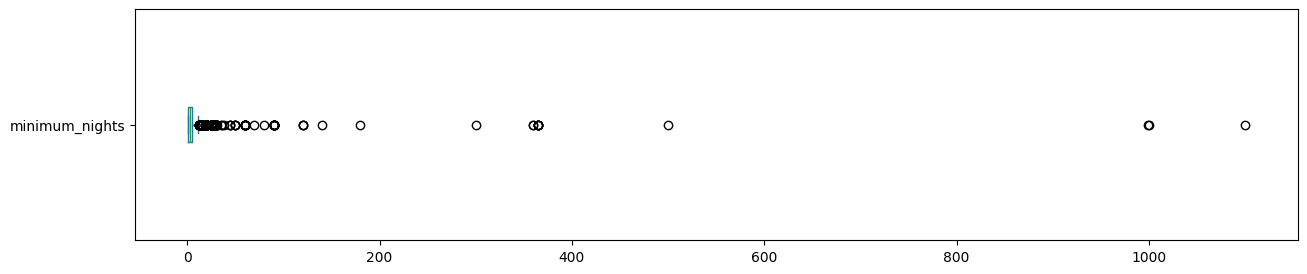

minimum_nights: valores acima de 30:
69 entradas
2.5698%


In [12]:
 # verificar box plot para minimum_nights com a quantidade de valores acima de 30 dias
 df.minimum_nights.plot(kind = 'box', vert=False, figsize=(15,3))
 plt.show()

 print("minimum_nights: valores acima de 30:")
 print("{} entradas".format(len(df[df.minimum_nights > 30])) )
 print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

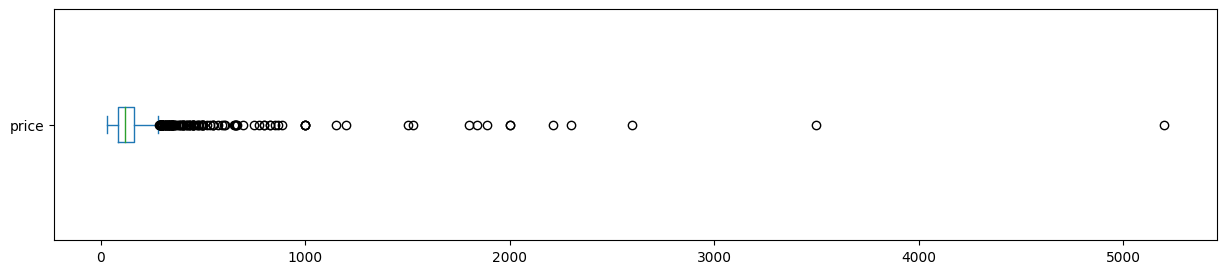


price: valores acima de 1500
11 entradas
0.4097%


In [13]:
 # verificar box plot para price com a quantidade de valores acima de 1500
 df.price.plot(kind ='box', vert=False, figsize=(15,3),)
 plt.show()

 print("\nprice: valores acima de 1500")
 print("{} entradas".format(len(df[df.price > 1500])))
 print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

### Histogramas sem *Outliers*

Por terem sido identificados *outliers* nas variáveis `minimum_nights`e `price`, realizaremos a limpeza do *DataFrame* delas e plotaremos novamente o histograma. Assim, executaremos os comandos abaixo:

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

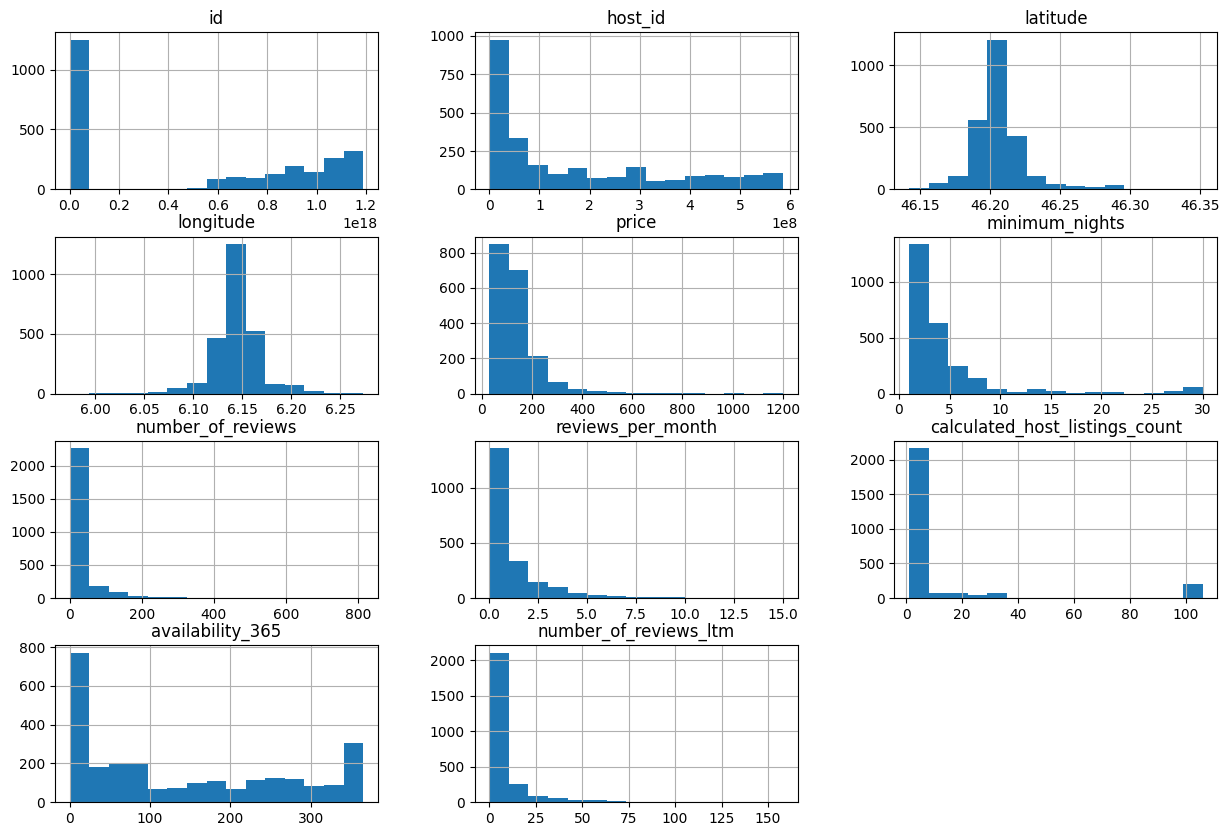

In [14]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover a variável `neighbourhood_group`, pois está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis númericas
df_clean.hist(bins=15, figsize=(15,10))


### **Q5. Qual a média dos preços de aluguel e minímo de noites?**

In [11]:
# ver a média da coluna `price``
df_clean.price.mean()


142.9003670686943

In [12]:
# ver a média das coluna `minimum_nights`
df_clean.minimum_nights.mean()

4.3273215656178055

### **Q6. Qual a correlação existente entre as variáveis**?

Correlação significa que existe uma relação entre duas coisas. Logo, para o nosso o contexto, estamos buscando uma relação ou semelhança entre duas variáveis.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação;
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`.

In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.023674,-0.049532,-0.119019,0.077779,0.062987
minimum_nights,-0.023674,1.000000,-0.105733,-0.206843,0.045112,0.064822
number_of_reviews,-0.049532,-0.105733,1.000000,0.425267,-0.058038,0.022488
reviews_per_month,-0.119019,-0.206843,0.425267,1.000000,-0.012639,0.083467
calculated_host_listings_count,0.077779,0.045112,-0.058038,-0.012639,1.000000,-0.039753
availability_365,0.062987,0.064822,0.022488,0.083467,-0.039753,1.000000


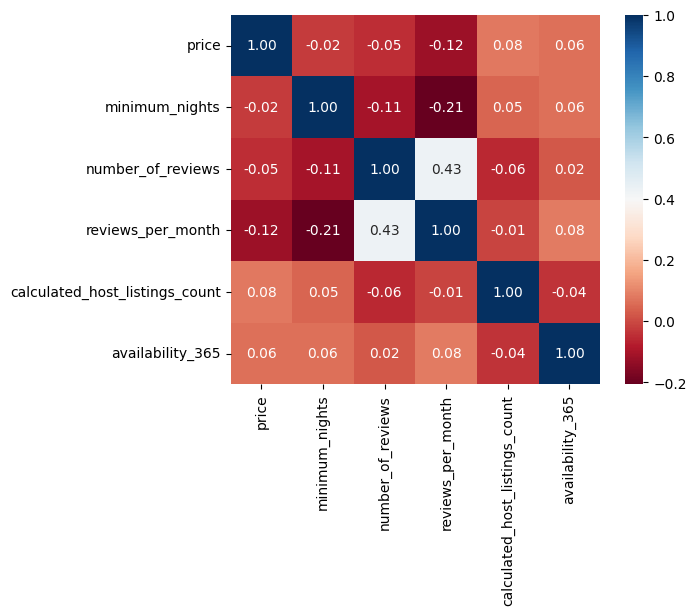

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type`indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Dessa forma, agora iremos saber a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.



In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


,count
room_type,
Entire home/apt,1833
Private room,758
Shared room,13
Hotel room,2


In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


,count
room_type,
Entire home/apt,0.703377
Private room,0.290867
Shared room,0.004988
Hotel room,0.000767


### **Q8. Qual a localidade mais cara de Genebra?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`.No caso, queremos comparar os bairros (*neighbourhoods) a partir do preço de locação.

In [16]:
# ver todos os bairros disponíveis
df_clean.neighbourhood.value_counts()


,count
neighbourhood,
Commune de Genève,1886
Carouge,106
Grand-Saconnex,68
Lancy,66
Vernier,63
Versoix,47
Chêne-Bougeries,44
Meyrin,43
Thônex,38


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:100]

,price
neighbourhood,
Troinex,322.000000
Bardonnex,315.400000
Cologny,285.157895
Corsier,262.500000
Confignon,209.750000
Genthod,202.818182
Chêne-Bougeries,187.575000
Presinge,182.000000
Perly-Certoux,175.000000


Percebe-se, pelos dados acima, que o bairro com maior quantidade de oferta de imóveis:`Commune de Genève`(1886)possui uma média de preço(143.72) praticamente igual a do segundo bairro(143.82) com maior quantidade: `Carouge`(106). Entretanto, Carouge tem quase 20x menos opções que Commune de Genève.  

In [ ]:
# ver os tipos de imóveis do bairro Comune de Genève
df_clean[df_clean.neighbourhood == 'Commune de Genève'].room_type.value_counts()

,count
room_type,
Entire home/apt,1408
Private room,465
Shared room,11
Hotel room,2


In [15]:
# ver os tipos de imóveis do bairro Carouge
df_clean[df_clean.neighbourhood == 'Carouge'].room_type.value_counts()

,count
room_type,
Entire home/apt,84
Private room,22


In [16]:
# ver a média de preços para o tipo de imóvel Entire home/apt do bairro Comune de Genève
df_clean[(df_clean.neighbourhood == 'Commune de Genève') & (df_clean.room_type == 'Entire home/apt')].price.mean()


162.75841584158417

In [17]:
# ver a média de preços para o tipo de imóvel Entire home/apt do bairro Carouge
df_clean[(df_clean.neighbourhood == 'Carouge') & (df_clean.room_type == 'Entire home/apt')].price.mean()


162.37037037037038

In [18]:
# ver a média de preços para o tipo de imóvel Private room do bairro Comune de Genève
df_clean[(df_clean.neighbourhood == 'Commune de Genève') & (df_clean.room_type == 'Private room')].price.mean()

89.34

In [19]:
# ver a média de preços para o tipo de imóvel Private do bairro Carouge
df_clean[(df_clean.neighbourhood == 'Carouge') & (df_clean.room_type == 'Private room')].price.mean()

91.10526315789474

Entende-se da análise acima que as médias de valores para o tipo de aluguel do imóvel, apartamento inteiro, dos bairros analisados são praticamente iguais com quantidade de ofertas bem diferentes. Infere-se que existe uma maior demanda por imóveis no bairro Comune de Genève.


In [20]:
# ver a quantidade de imóveis no tipo de imóvel Hotel Room do bairro Comune de Genève
df_clean[(df_clean.neighbourhood == 'Commune de Genève') & (df_clean.room_type == 'Hotel room')].shape[0]




2

In [21]:
# ver os 2 imóveis tipo Hotel Room do bairro 'Comune de Genève'
df_clean[(df_clean.neighbourhood == 'Commune de Genève') & (df_clean.room_type == 'Hotel room')]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
324,16199048,Comfortable & Cosy Single Room - Geneva Heart,3528377,Marc,Commune de Genève,46.20044,6.1616,Hotel room,NaN,1,14,2022-05-01,0.16,99,361,0,NaN
325,16257353,Spacious & Cosy Double Room - Geneva Heart,3528377,Marc,Commune de Genève,46.20044,6.1616,Hotel room,NaN,1,10,2022-08-07,0.11,99,361,0,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude`e `y=latitude`.

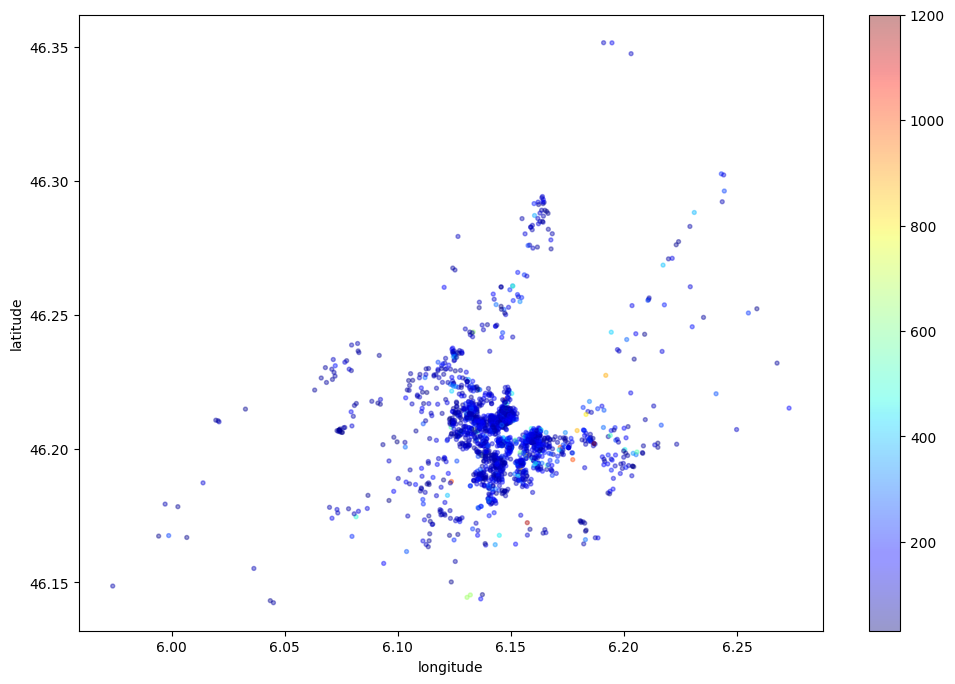

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));



## Conclusões


Realizou-se uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Percebeu-se também que em algumas localidades há poucos imóves disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, deve-se lembrar que o *dataset* analisado é uma versão resumida, ideal para uma abordagem inicial. Recomenda-se que para uma análise mais aprofundada, seja utilizado o conjunto de dados completos.